<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Re-inforcement-Learning/blob/main/2348505_Lab3(RL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Necessary Libraries**

In [37]:
import numpy as np
import pydot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from io import BytesIO

# **Lab 3: Implement Markov Decision Process (MDP) Simulation and Value Iteration**

**Markov Decision Process (MDP)**
We'll first define the components of the MDP:

1. **States:** The possible configurations of the environment.
2. **Actions:** The possible actions the agent can take in each state.
3. **Transition Probabilities:** The probability of moving to a new state given the current state and action.
4. **Rewards:** The reward received after transitioning from one state to another.
5. **Discount Factor:** A factor that discounts future rewards to their present value.

In [39]:
class MDP:
    def __init__(self, states, actions, transition_probabilities, rewards, discount_factor, threshold=1e-6):
        self.states = states
        self.actions = actions
        self.transition_probabilities = transition_probabilities
        self.rewards = rewards
        self.discount_factor = discount_factor
        self.threshold = threshold
        self.value_table = {state: 0 for state in states}

    def value_iteration(self):
        while True:
            delta = 0
            new_value_table = self.value_table.copy()

            for state in self.states:
                action_values = []

                for action in self.actions:
                    action_value = 0
                    for prob, next_state in self.transition_probabilities[state][action]:
                        # Get the reward directly without indexing
                        reward = self.rewards[state][action]
                        action_value += prob * (reward + self.discount_factor * self.value_table[next_state])
                    action_values.append(action_value)

                new_value_table[state] = max(action_values)

                delta = max(delta, abs(new_value_table[state] - self.value_table[state]))

            self.value_table = new_value_table

            if delta < self.threshold:
                break

        policy = self.derive_policy()
        return policy, self.value_table

    def derive_policy(self):
        policy = {}
        for state in self.states:
            action_values = {}
            for action in self.actions:
                action_value = 0
                for prob, next_state in self.transition_probabilities[state][action]:
                    # Access the reward directly
                    reward = self.rewards[state][action]
                    action_value += prob * (reward + self.discount_factor * self.value_table[next_state])
                action_values[action] = action_value

            # Choose the action with the highest value
            policy[state] = max(action_values, key=action_values.get)
        return policy


In [40]:
# Define states, actions, transition probabilities, and rewards
states = ["Sitting", "Standing", "Foot Forward", "Crashed", "Hand(s) Raised", "Shut Down"]
actions = ["Sit", "Stand", "Step Forward", "Raise Hands", "Shut Down"]

transition_probabilities = {
    'Sitting': {
        'Sit': [(1.0, 'Sitting')],
        'Stand': [(0.6, 'Standing'), (0.3, 'Sitting'), (0.1, 'Foot Forward')],
        'Step Forward': [(0.3, 'Foot Forward'), (0.6, 'Sitting'), (0.1, 'Hand(s) Raised')],
        'Raise Hands': [(1.0, 'Hand(s) Raised')],
        'Shut Down': [(1.0, 'Shut Down')]
    },
    'Standing': {
        'Sit': [(1.0, 'Sitting')],
        'Stand': [(0.5, 'Standing'), (0.5, 'Foot Forward')],
        'Step Forward': [(0.5, 'Foot Forward'), (0.5, 'Hand(s) Raised')],
        'Raise Hands': [(1.0, 'Hand(s) Raised')],
        'Shut Down': [(1.0, 'Shut Down')]
    },
    'Foot Forward': {
        'Sit': [(0.1, 'Sitting')],
        'Stand': [(0.1, 'Standing')],
        'Step Forward': [(0.4, 'Foot Forward'), (0.2, 'Crashed'), (0.3, 'Hand(s) Raised')],
        'Raise Hands': [(1.0, 'Hand(s) Raised')],
        'Shut Down': [(1.0, 'Shut Down')]
    },
    'Crashed': {
        'Sit': [(0.1, 'Sitting')],
        'Stand': [(0.1, 'Standing')],
        'Step Forward': [(0.1, 'Foot Forward')],
        'Raise Hands': [(0.1, 'Hand(s) Raised')],
        'Shut Down': [(0.7, 'Shut Down')]
    },
    'Hand(s) Raised': {
        'Sit': [(0.5, 'Sitting')],
        'Stand': [(0.5, 'Standing')],
        'Step Forward': [(0.1, 'Foot Forward')],
        'Raise Hands': [(1.0, 'Hand(s) Raised')],
        'Shut Down': [(1.0, 'Shut Down')]
    },
    'Shut Down': {
        'Sit': [(1.0, 'Shut Down')],
        'Stand': [(1.0, 'Shut Down')],
        'Step Forward': [(1.0, 'Shut Down')],
        'Raise Hands': [(1.0, 'Shut Down')],
        'Shut Down': [(1.0, 'Shut Down')]
    }
}

rewards = {
    "Sitting": {
        "Sit": 0,
        "Stand": 1,
        "Step Forward": 1,
        "Raise Hands": -1,
        "Shut Down": 0
    },
    "Standing": {
        "Sit": 0,
        "Stand": 1,
        "Step Forward": 1,
        "Raise Hands": -1,
        "Shut Down": 0
    },
    "Foot Forward": {
        "Sit": -1,
        "Stand": -1,
        "Step Forward": 1,
        "Raise Hands": -1,
        "Shut Down": 0
    },
    "Crashed": {
        "Sit": -10,
        "Stand": -10,
        "Step Forward": -10,
        "Raise Hands": -10,
        "Shut Down": 0
    },
    "Hand(s) Raised": {
        "Sit": -1,
        "Stand": -1,
        "Step Forward": -1,
        "Raise Hands": -1,
        "Shut Down": 0
    },
    "Shut Down": {
        "Sit": 0,
        "Stand": 0,
        "Step Forward": 0,
        "Raise Hands": 0,
        "Shut Down": 0
    }
}

# Create an MDP instance
mdp = MDP(states, actions, transition_probabilities, rewards, discount_factor=0.9)

# Run value iteration
policy, value_table = mdp.value_iteration()

# Print the optimal policy and value function
print("Optimal Policy:")
for state, action in policy.items():
    print(f"{state}: {action}")

print("Optimal Value Function:")
for state, value in value_table.items():
    print(f"{state}: {value}")

Optimal Policy:
Sitting: Stand
Standing: Sit
Foot Forward: Step Forward
Crashed: Shut Down
Hand(s) Raised: Sit
Shut Down: Sit
Optimal Value Function:
Sitting: 4.8810411071626785
Standing: 4.392936186222048
Foot Forward: 2.1219471351827344
Crashed: 0.0
Hand(s) Raised: 1.696468093111024
Shut Down: 0.0


### Inference on States, Actions, Transition Probabilities, and Optimal Policy

The defined states, actions, transition probabilities, and optimal policy provide a comprehensive framework for understanding the dynamics of an agent’s behavior in a reinforcement learning environment. Below is an analysis of the components and their implications:

#### States and Actions
1. **Defined States**:
   - The states represent various physical positions or conditions: **"Sitting," "Standing," "Foot Forward," "Crashed," "Hand(s) Raised,"** and **"Shut Down."** Each state captures a unique aspect of the agent's behavior, providing a basis for decision-making.

2. **Possible Actions**:
   - The actions available to the agent—**"Sit," "Stand," "Step Forward," "Raise Hands,"** and **"Shut Down"**—indicate the choices the agent can make from each state. This variety allows for strategic exploration of the environment to identify optimal behaviors.

#### Transition Probabilities
1. **Probabilistic Behavior**:
   - The transition probabilities indicate the likelihood of moving from one state to another based on the selected action. For example, when in the **"Sitting"** state and choosing to **"Stand,"** there is a 60% chance of successfully transitioning to **"Standing,"** a 30% chance of remaining in **"Sitting,"** and a 10% chance of moving to **"Foot Forward."** This introduces an element of uncertainty, simulating real-world scenarios where actions may not always yield expected results.

2. **Dynamic Interactions**:
   - The probabilities help model the complexities of physical interactions, allowing the agent to learn from experience. The varied outcomes for each action emphasize the need for careful decision-making, as some actions can lead to undesirable states, such as a transition to **"Crashed."**

#### Optimal Policy
1. **Strategic Decisions**:
   - The optimal policy suggests the best action to take from each state to maximize long-term rewards:
     - **Sitting:** Stand
     - **Standing:** Sit
     - **Foot Forward:** Step Forward
     - **Crashed:** Shut Down
     - **Hand(s) Raised:** Sit
     - **Shut Down:** Sit
   - This policy reflects a strategy focused on maintaining balance and avoiding negative states, particularly the **"Crashed"** and **"Shut Down"** states. It encourages proactive behaviors (like standing and stepping forward) while minimizing the risk of undesirable outcomes.

#### Optimal Value Function
1. **Value Assessment**:
   - The optimal value function values for each state illustrate the expected long-term rewards associated with each state:
     - **Sitting:** 4.88
     - **Standing:** 4.39
     - **Foot Forward:** 2.12
     - **Crashed:** 0.0
     - **Hand(s) Raised:** 1.70
     - **Shut Down:** 0.0
   - Higher values for **"Sitting"** and **"Standing"** indicate that these states yield more favorable long-term outcomes compared to others. Conversely, states like **"Crashed"** and **"Shut Down"** have a value of 0, representing scenarios where the agent is effectively not progressing or is in a state of failure.





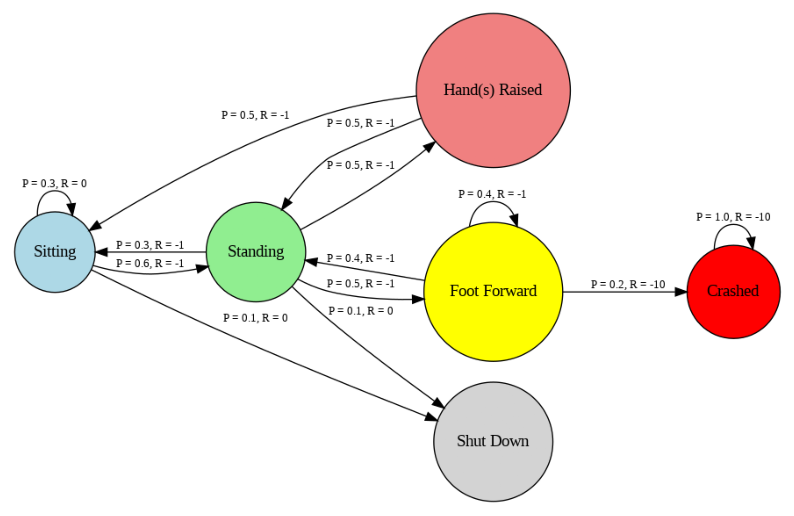

In [36]:
graph = pydot.Dot(graph_type='digraph', rankdir='LR')
states = ['Sitting', 'Standing', 'Foot Forward', 'Hand(s) Raised', 'Shut Down', 'Crashed']
state_colors = {
    'Sitting': 'lightblue',
    'Standing': 'lightgreen',
    'Foot Forward': 'yellow',
    'Hand(s) Raised': 'lightcoral',
    'Shut Down': 'lightgray',
    'Crashed': 'red'
}

for state in states:
    color = state_colors[state]
    node = pydot.Node(state, shape='circle', style='filled', fillcolor=color)
    graph.add_node(node)

transitions = [
    ('Sitting', 'Sitting', 0.3, 0),
    ('Sitting', 'Standing', 0.6, -1),
    ('Sitting', 'Shut Down', 0.1, 0),
    ('Standing', 'Sitting', 0.3, -1),
    ('Standing', 'Hand(s) Raised', 0.5, -1),
    ('Standing', 'Shut Down', 0.1, 0),
    ('Standing', 'Foot Forward', 0.5, -1),
    ('Foot Forward', 'Foot Forward', 0.4, -1),
    ('Foot Forward', 'Standing', 0.4, -1),
    ('Foot Forward', 'Crashed', 0.2, -10),
    ('Hand(s) Raised', 'Standing', 0.5, -1),
    ('Hand(s) Raised', 'Sitting', 0.5, -1),
    ('Crashed', 'Crashed', 1.0, -10)
]

for start, end, prob, reward in transitions:
    edge_label = f'P = {prob}, R = {reward}'
    edge = pydot.Edge(start, end, label=edge_label, fontsize="10", fontcolor="black")
    graph.add_edge(edge)

png_str = graph.create_png()
sio = BytesIO(png_str)

img = mpimg.imread(sio)

plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

### Inference on the Reward Structure and State Transitions

The modified reward structure and state transitions outlined in the graph serve to guide the behavior of an agent in a reinforcement learning environment, specifically in the context of physical movements such as sitting, standing, and stepping forward. Here’s a detailed analysis of the implications of this reward structure:

#### Positive Rewards
1. **Encouragement of Desired Behaviors**:
   - The positive rewards assigned for transitioning to **"Standing"** and **"Foot Forward"** from **"Sitting"** or **"Standing"** reinforce desired physical behaviors. For instance, encouraging an agent to stand or step forward reflects a motivation to maintain an active posture, which may be beneficial in real-world applications such as fitness or rehabilitation.
  
2. **Balanced Incentives**:
   - By providing equal positive rewards for both **"Stand"** and **"Step Forward"**, the model encourages exploration of multiple active postures. This balance is essential in environments where both standing still and moving forward can be advantageous based on the context.

#### Negative Rewards
1. **Discouragement of Undesirable Actions**:
   - Negative rewards assigned to actions like **"Raise Hands"** and transitions from **"Crashed"** state reflect undesirable behaviors that could lead to less effective states. For example, raising hands might be a risky action in certain contexts where stability is critical, thus leading to a negative reward.
   
2. **Severe Penalty for Crashed State**:
   - The **"Crashed"** state has a notably high negative reward (-10) for all transitions, emphasizing the criticality of avoiding this state. This penalty signifies that a crash represents a failure, likely resulting from an excessive or unsafe movement, prompting the agent to prioritize stability.

#### Neutral Outcomes
1. **Neutral Actions**:
   - The **"Shut Down"** state is treated as a neutral scenario with zero rewards across all actions, indicating a state of inactivity or safety. This aligns with systems where downtime does not incur any penalties but also does not contribute positively to the overall objective.


